## About Dataset

It is taken from Kaggle. It contains 1500 bills' measurements such as its length, height, margin, etc. There are some real bills and some fake bills. We want to create a model that can predict authenticity of the bill based on its measurements.

## Problem Statement

To predict fake bills given its measurements.

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## 2. Importing Dataset

In [2]:
df = pd.read_excel(r"C:\Users\dell\Downloads\Fake Bills.xlsx")
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


## 3. Exploring Data

In [3]:
df.shape

(1500, 7)

In [4]:
df.size

10500

In [5]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
df.rename(columns = {'height_right':"breadth_right", "height_left":'breadth_left'}, inplace = True)
df.head(3)

,is_genuine,diagonal,breadth_left,breadth_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16


In [8]:
df.columns

Index(['is_genuine', 'diagonal', 'breadth_left', 'breadth_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

* ### What do columns indicate?

1. is_genuine: Is the bill genuine?
2. diagonal: The diagonal measurement of bill in mm
3. breadth_left: The height on left side in mm
4. breadth_right: The height on right side in mm
5. margin_low: The lower margin in mm
6. margin_up: The upper margin in mm
7. length: The total length of bill in mm


Here, 'is_genuine' is the decision variable. 

## 4. Data Preprocessing

* ### Shift "is_genuine" column to the last

In [9]:
Col_list = ["diagonal","breadth_left","breadth_right","margin_low","margin_up","length","is_genuine"]
df = df.reindex(columns = Col_list)
#df.columns[::-1] --> reversing columns

In [10]:
df.head(2)

,diagonal,breadth_left,breadth_right,margin_low,margin_up,length,is_genuine
0,171.81,104.86,104.95,4.52,2.89,112.83,True
1,171.46,103.36,103.66,3.77,2.99,113.09,True


* ### Changing "is_genuine" column into numerical data type

In [11]:
df["is_genuine"] = df["is_genuine"].astype(int)
#df.replace({"is_genuine" : True},1)

In [12]:
df.head(2)

,diagonal,breadth_left,breadth_right,margin_low,margin_up,length,is_genuine
0,171.81,104.86,104.95,4.52,2.89,112.83,1
1,171.46,103.36,103.66,3.77,2.99,113.09,1


* ### Checking duplicated values

In [13]:
df.duplicated().sum()

0

* ### Checking null values

In [14]:
df.isnull().sum()

diagonal          0
breadth_left      0
breadth_right     0
margin_low       37
margin_up         0
length            0
is_genuine        0
dtype: int64

There are null values in 'margin_low' column. Since it is numerical data, fill null values by mean value.

* ### Filling null values

In [15]:
a = round(df["margin_low"].mean(),2)
a

4.49

In [16]:
df["margin_low"].fillna(a, inplace = True)

In [17]:
df.isnull().sum()

diagonal         0
breadth_left     0
breadth_right    0
margin_low       0
margin_up        0
length           0
is_genuine       0
dtype: int64

## 5. Data Visualization

array([[<AxesSubplot:title={'center':'diagonal'}>,
        <AxesSubplot:title={'center':'breadth_left'}>],
       [<AxesSubplot:title={'center':'breadth_right'}>,
        <AxesSubplot:title={'center':'margin_low'}>],
       [<AxesSubplot:title={'center':'margin_up'}>,
        <AxesSubplot:title={'center':'length'}>]], dtype=object)

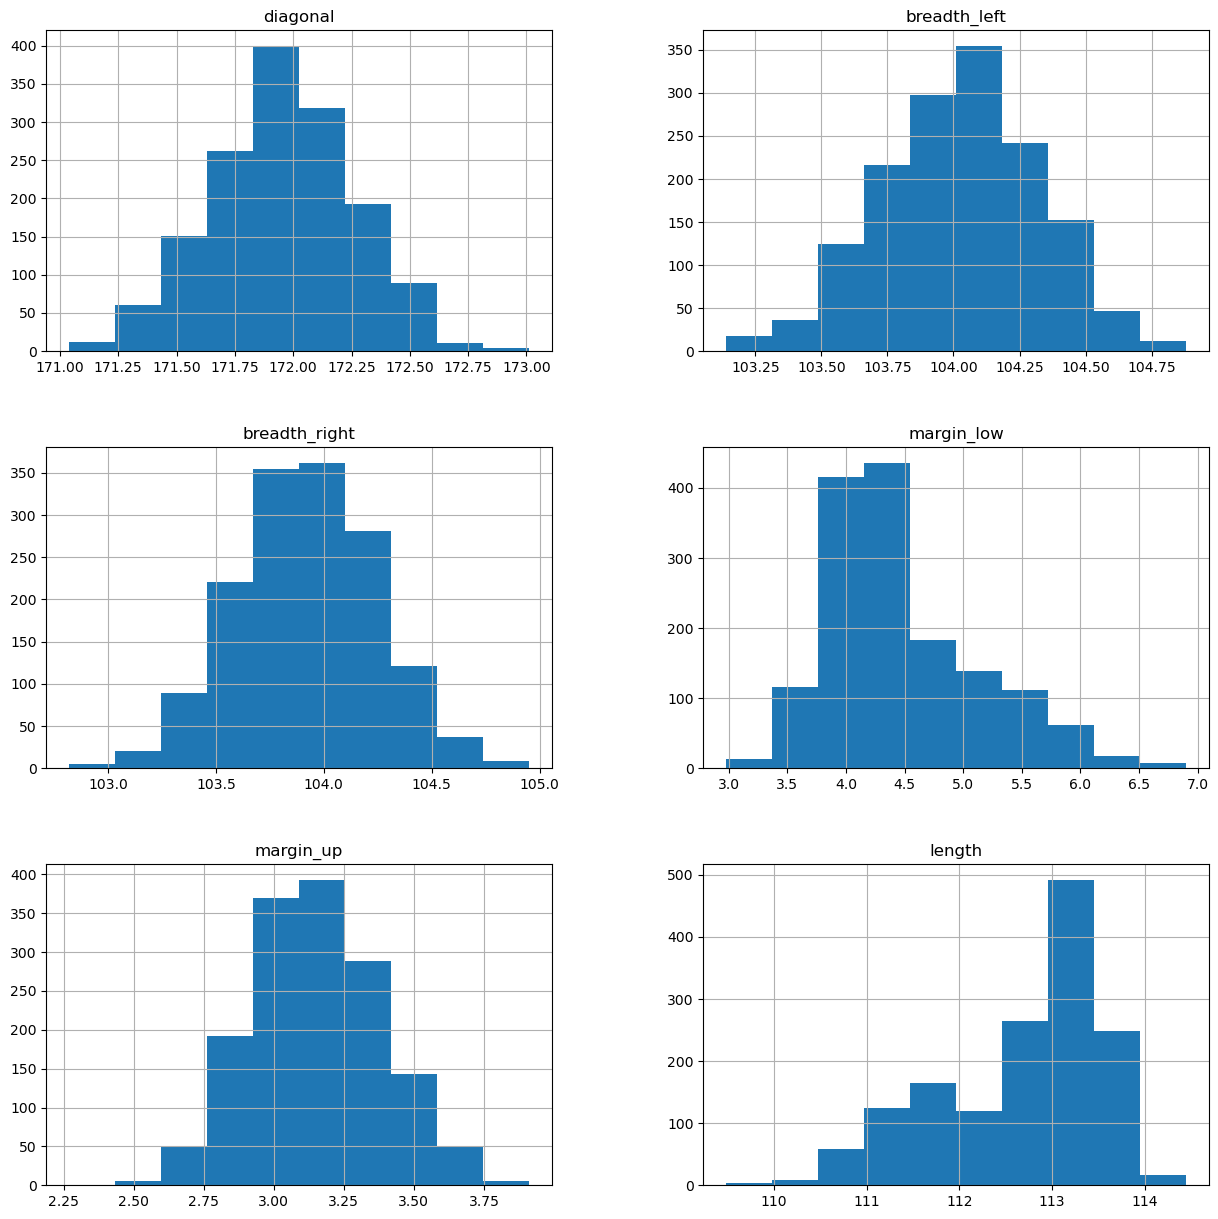

In [18]:
col = ["diagonal","breadth_left","breadth_right","margin_low","margin_up","length"]
df[col].hist(figsize = (15,15))

#### Above plot gives frequency distribution of different features. 

<AxesSubplot:>

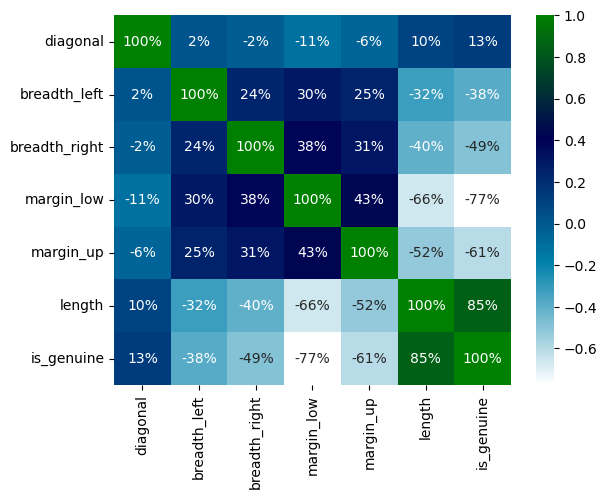

In [19]:
sns.heatmap(df.corr(), annot=True, cmap = "ocean_r", fmt = '.0%')

#### Above plot shows that the decision variable - "is_genuine" - is strongly related to "length" and weakly related to "margin_low".

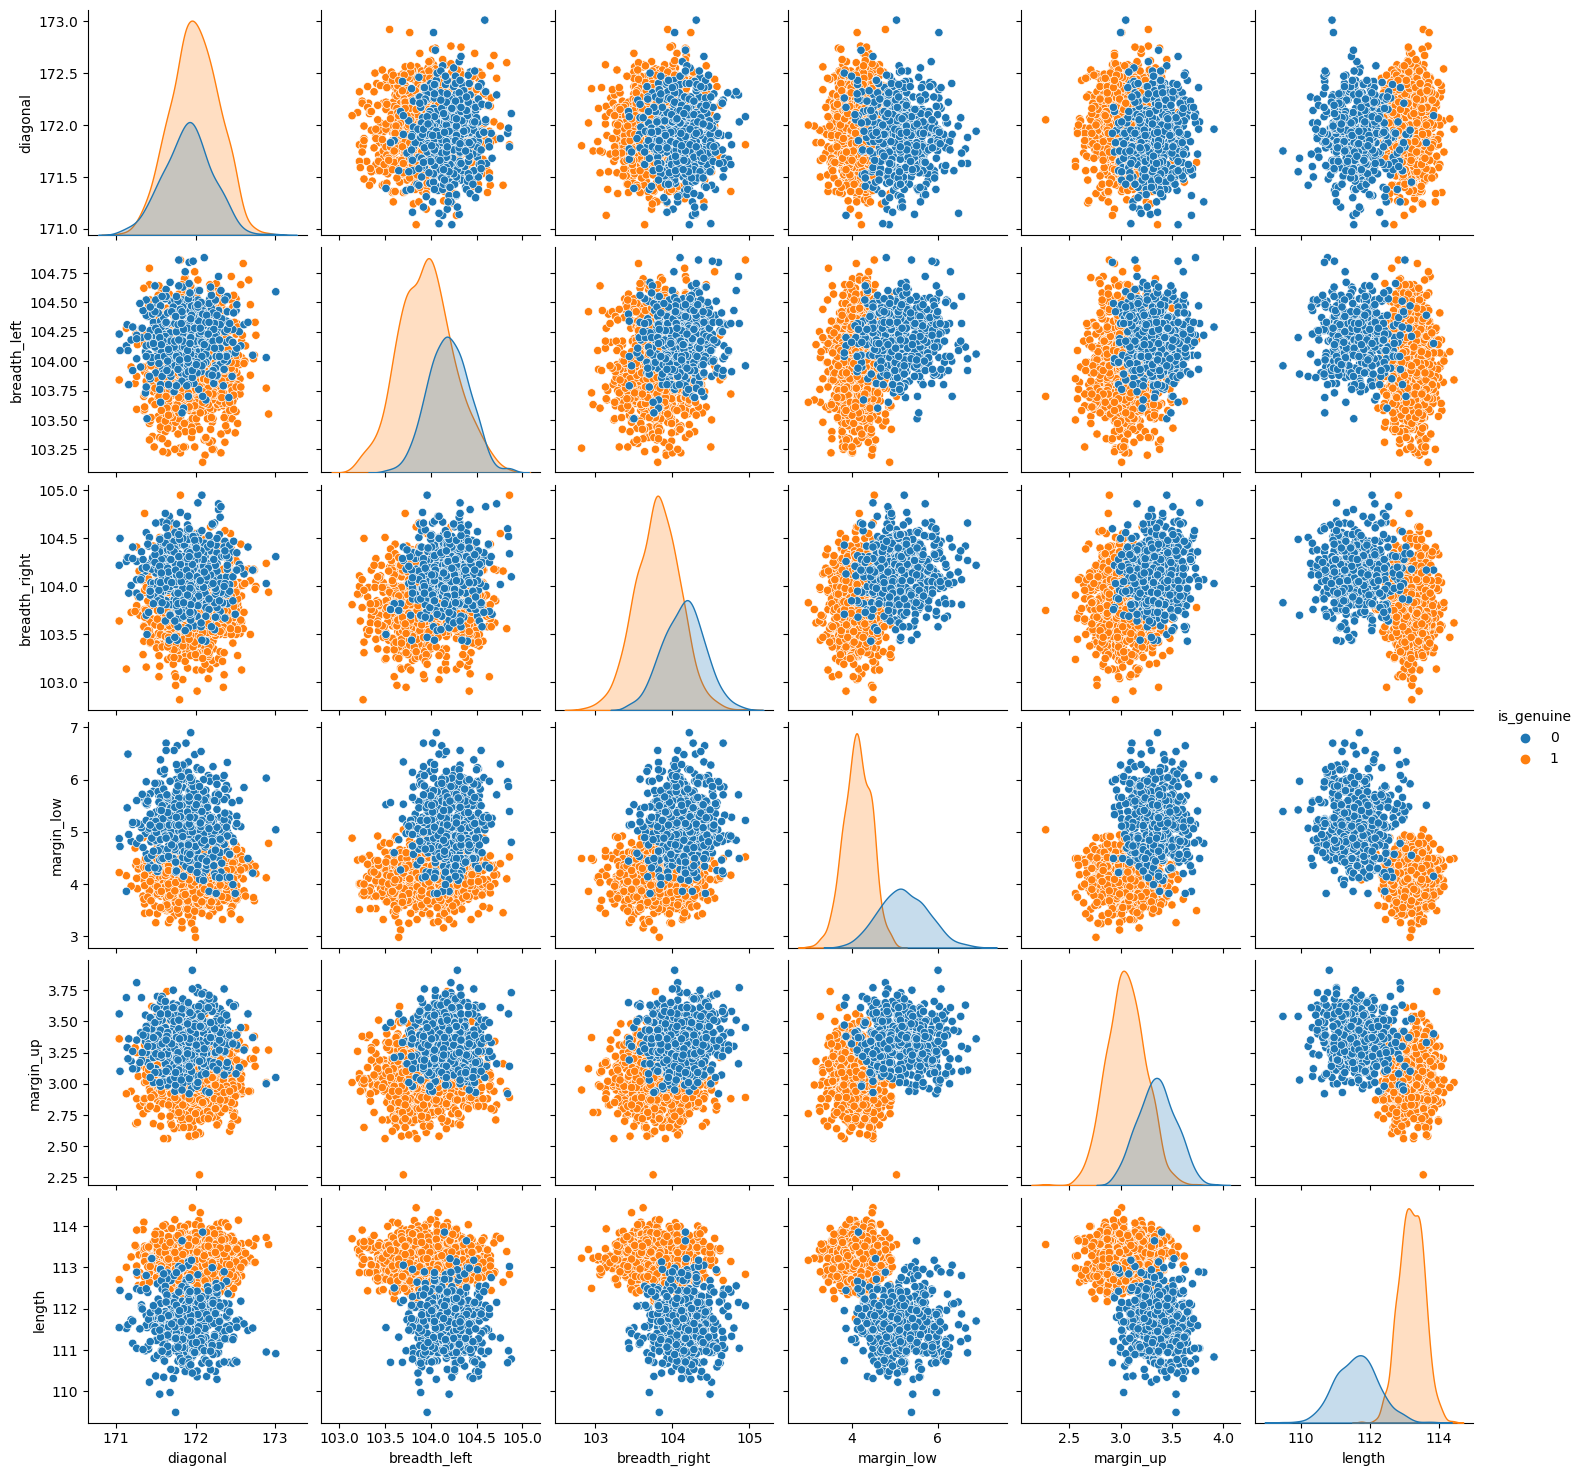

In [20]:
sns.pairplot(data=df, hue='is_genuine')
plt.show()

#### Above plot shows relationship among different data features.

# <div align = "center">  BUILDING MODELS </div>

* ### Defining x and y variables

In [21]:
x = df.iloc[:,:-1]
y = df["is_genuine"]

* ### Splitting Data

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 30, stratify = y)

In [23]:
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

(1050, 6) (450, 6)
(1050,) (450,)


## (i) Logistic Regression 

In [24]:
# Building model
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(xtrain, ytrain)

LogisticRegression()

In [25]:
#Checking model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

In [26]:
# Testing data evaluation
y_pred_test = lg.predict(xtest)

Accuracy = accuracy_score(ytest, y_pred_test)
print("Accuracy:", Accuracy)

Recall = recall_score(ytest, y_pred_test)
print("Recall:", Recall)

Precision = precision_score(ytest, y_pred_test)
print("Precision:", Precision)

F1_score = f1_score(ytest, y_pred_test)
print("F1 score:", F1_score)

Confusion_matrix = confusion_matrix(ytest, y_pred_test)
print("Confusion Matrix: \n",Confusion_matrix) 

Classification_report = classification_report(ytest, y_pred_test)
print("Classification Report: \n ", Classification_report)

Accuracy: 0.9911111111111112
Recall: 1.0
Precision: 0.9868421052631579
F1 score: 0.9933774834437086
Confusion Matrix: 
 [[146   4]
 [  0 300]]
Classification Report: 
                precision    recall  f1-score   support

           0       1.00      0.97      0.99       150
           1       0.99      1.00      0.99       300

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [27]:
# Training data evaluation
y_pred_train = lg.predict(xtrain)

Accuracy = accuracy_score(ytrain, y_pred_train)
print("Accuracy:", Accuracy)

Recall = recall_score(ytrain, y_pred_train)
print("Recall:", Recall)

Precision = precision_score(ytrain, y_pred_train)
print("Precision:", Precision)

F1_score = f1_score(ytrain, y_pred_train)
print("F1 score:", F1_score)

Confusion_matrix = confusion_matrix(ytrain, y_pred_train)
print("Confusion Matrix: \n",Confusion_matrix) 

Classification_report = classification_report(ytrain, y_pred_train)
print("Classification Report: \n ", Classification_report)

Accuracy: 0.9914285714285714
Recall: 0.9942857142857143
Precision: 0.992867332382311
F1 score: 0.993576017130621
Confusion Matrix: 
 [[345   5]
 [  4 696]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.99      0.99      0.99       350
           1       0.99      0.99      0.99       700

    accuracy                           0.99      1050
   macro avg       0.99      0.99      0.99      1050
weighted avg       0.99      0.99      0.99      1050



#### There is 99% accuracy for both training and testing data. Thus there is neither underfitting nor overfitting. Hence the logistic model is robust.

## (ii) Decision Tree Model

In [28]:
# Model building - Decison Tree Classifier with criterion gini index
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 12)
DTC.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3, random_state=12)

In [29]:
y_pred_gini = DTC.predict(xtest)

In [30]:
# Checking model performance
Accuracy = accuracy_score(ytest, y_pred_gini)
print("Accuracy:", Accuracy)

Accuracy: 0.9888888888888889


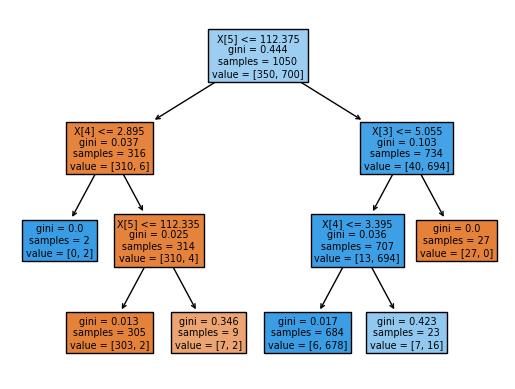

In [31]:
# Visualize decision tree
from sklearn import tree
tree.plot_tree(DTC.fit(xtrain, ytrain), filled = True)
plt.show()

In [32]:
# Check for overfitting
print('Training set score: {:.4f}'.format(DTC.score(xtrain, ytrain)))
print('Test set score: {:.4f}'.format(DTC.score(xtest, ytest)))

Training set score: 0.9838
Test set score: 0.9889


#### Here, the training set score is 0.9838 and the testing set score is 0.9889. These two values are quite comparable. So, there is no sign of overfitting.

## (iii) kNN (k- Nearest Neighbours) Model

In [33]:
# Splitting data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 30)

# Building Model
from sklearn.neighbors import KNeighborsClassifier

err_rate = []
for i in range (1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    i_pred = knn.predict(xtest)
    err_rate.append(np.mean(i_pred != ytest))

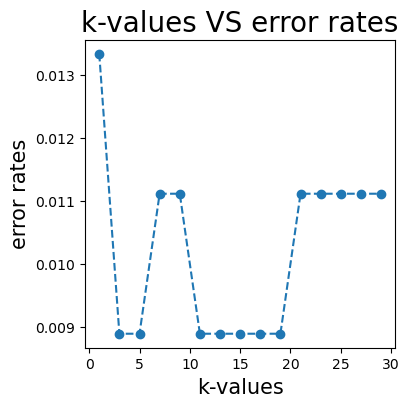

In [34]:
plt.figure(figsize=(4,4))
plt.plot(range(1,30,2), err_rate, linestyle = "dashed", marker = "o")
plt.title("k-values VS error rates", fontsize =20)
plt.xlabel("k-values",fontsize =15)
plt.ylabel("error rates",fontsize =15)
plt.show()

#### Minimum error first obtained at k = 4.

In [35]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=4)

In [36]:
pred = knn.predict(xtest)

In [37]:
Accuracy = accuracy_score(ytest, pred)
print("Accuracy:", Accuracy)

Recall = recall_score(ytest, pred)
print("Recall:", Recall)

Precision = precision_score(ytest, pred)
print("Precision:", Precision)

F1_score = f1_score(ytest, pred)
print("F1 score:", F1_score)

Classification_report = classification_report(ytest, pred)
print("Classification Report: \n ", Classification_report)

Accuracy: 0.9911111111111112
Recall: 0.9965635738831615
Precision: 0.9897610921501706
F1 score: 0.9931506849315068
Classification Report: 
                precision    recall  f1-score   support

           0       0.99      0.98      0.99       159
           1       0.99      1.00      0.99       291

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



#### Our kNN model is 99% accurate!

## (iv) SVM (Support Vector Machine) Model

In [38]:
# Defining variables
x = df.iloc[:,:-1]
y = df["is_genuine"]

In [39]:
# Standardize the data
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = mm.fit_transform(x)
X

array([[0.39086294, 0.98850575, 1.        , 0.39285714, 0.37804878,
        0.67474747],
       [0.21319797, 0.12643678, 0.3943662 , 0.20153061, 0.43902439,
        0.72727273],
       [0.83756345, 0.77011494, 0.31924883, 0.3622449 , 0.40853659,
        0.74141414],
       ...,
       [0.3857868 , 0.5       , 0.61032864, 0.64540816, 0.66463415,
        0.4969697 ],
       [0.5177665 , 0.65517241, 0.58215962, 0.55867347, 0.72560976,
        0.55757576],
       [0.21827411, 0.58045977, 0.46948357, 0.42091837, 0.67073171,
        0.52121212]])

In [40]:
pd.DataFrame(X)

,0,1,2,3,4,5
0,0.390863,0.988506,1.000000,0.392857,0.378049,0.674747
1,0.213198,0.126437,0.394366,0.201531,0.439024,0.727273
2,0.837563,0.770115,0.319249,0.362245,0.408537,0.741414
3,0.162437,0.442529,0.525822,0.163265,0.451220,0.812121
4,0.350254,0.655172,0.300469,0.270408,0.737805,0.616162
...,...,...,...,...,...,...
1495,0.360406,0.712644,0.633803,0.367347,0.500000,0.361616
1496,0.583756,0.856322,0.760563,0.584184,0.670732,0.298990
1497,0.385787,0.500000,0.610329,0.645408,0.664634,0.496970
1498,0.517766,0.655172,0.582160,0.558673,0.725610,0.557576


In [41]:
# Splitting data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 30)

In [42]:
# Model Buiding
from sklearn.svm import SVC
clf = SVC()
clf.fit(xtrain, ytrain)

SVC()

In [43]:
from sklearn.model_selection import GridSearchCV

parameters = [{"C":[1,10,100,1000],
              "kernel":["sigmoid", "rbf","poly"],
              "gamma":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

gd = GridSearchCV(estimator = clf,
                 param_grid = parameters,
                 scoring = "accuracy", 
                 cv = 10,
                 n_jobs = -1)

gd.fit(xtrain, ytrain)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['sigmoid', 'rbf', 'poly']}],
             scoring='accuracy')

In [44]:
print(gd.best_score_)
print(gd.best_params_)

0.9928887484197219
{'C': 1, 'gamma': 0.4, 'kernel': 'sigmoid'}


In [45]:
# Evalution of SVM model
clf_1 = SVC(C= 1, gamma= 0.4, kernel= 'sigmoid')
clf_1.fit(xtrain, ytrain)

# Predicton
y_pred = clf_1.predict(xtest)

# Model performance
print('Accracy score is', accuracy_score(ytest, y_pred)) 
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

Accracy score is 0.9866666666666667
[[133   4]
 [  1 237]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       137
           1       0.98      1.00      0.99       238

    accuracy                           0.99       375
   macro avg       0.99      0.98      0.99       375
weighted avg       0.99      0.99      0.99       375



#### Our SVM model has 98.67% accuracy.

## Reference

* https://www.kaggle.com/datasets/alexandrepetit881234/fake-bills?datasetId=2914044